Iris 鸢尾花数据集是一个经典数据集，在统计学习和机器学习领域都经常被用作示例。数据集内包含 3 类共 150 条记录，每类各 50 个数据，每条记录都有 4 项特征：花萼长度、花萼宽度、花瓣长度、花瓣宽度，可以通过这4个特征预测鸢尾花卉属于（iris-setosa, iris-versicolour, iris-virginica）中的哪一品种。

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris 
from pandas import plotting
import math

In [4]:
data = load_iris()

In [5]:
print(dir(data))  # 查看data所具有的属性或方法

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']


In [6]:
print(data.feature_names)  # 查看数据集的简介

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
#直接读到pandas的数据框中
df_iris = pd.DataFrame(data=data.data, columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
df_iris.info()  #查看数据集信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
df_iris['Species'] = data.target_names[data.target]

# 数据预处理

通过特征提取，我们能得到未经处理的特征，这时的特征可能有以下问题：
* 不属于同一量纲：即特征的规格不一样，不能够放在一起比较。无量纲化可以解决这一问题。
* 信息冗余：对于某些定量特征，其包含的有效信息为区间划分，例如学习成绩，假若只关心“及格”或不“及格”，那么需要将定量的考分，转换成“1”和“0”表示及格和未及格。二值化可以解决这一问题。
* 定性特征不能直接使用：某些机器学习算法和模型只能接受定量特征的输入，那么需要将定性特征转换为定量特征。最简单的方式是为每一种定性值指定一个定量值，但是这种方式过于灵活，增加了调参的工作。通常使用哑编码的方式将定性特征转换为定量特征：假设有N种定性值，则将这一个特征扩展为N种特征，当原始特征值为第i种定性值时，第i个扩展特征赋值为1，其他扩展特征赋值为0。哑编码的方式相比直接指定的方式，不用增加调参的工作，对于线性模型来说，使用哑编码后的特征可达到非线性的效果。
* 存在缺失值：缺失值需要补充。
* 信息利用率低：不同的机器学习算法和模型对数据中信息的利用是不同的，之前提到在线性模型中，使用对定性特征哑编码可以达到非线性的效果。类似地，对定量变量多项式化，或者进行其他的转换，都能达到非线性的效果。

使用sklearn中的preproccessing库来进行数据预处理，可以覆盖以上问题的解决方案。

## 归一化
归一化是依照特征矩阵的行处理数据，其目的在于样本向量在点乘运算或其他核函数计算相似性时，拥有统一的标准，也就是说都转化为“单位向量”。

In [9]:
from sklearn.preprocessing import Normalizer
 
#归一化，返回值为归一化后的数据
Normalizer().fit_transform(data.data)

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

## 标准化
标准化，基于特征矩阵的列，将特征值转换至服从标准正态分布

In [11]:
from sklearn.preprocessing import StandardScaler
 
#标准化，返回值为标准化后的数据
StandardScaler().fit_transform(data.data)

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

比较搞混的一点是StandardScaler和Normalizer这个两个概念的问题(大家翻译上的误差导致信息非常混乱)，其实StandardScaler就是尺寸缩放问题，即使同一特征下的数值在一定范围内浮动，如将数值所放在0-1范围内(MinMaxScaler), 或者将数据标准化成为均值为0，方差为1的数据(Z-score)；而另一个就是Normalizer，将同一行数据的不同特征进行规范化，这样一个数据的不同特征具有相同的量纲或者表现力，比如说一个特征是身高，1.7m，体重为150斤，那么两个特征之间差距太大，身高这个特征变化根本无法起到决定作用(在体重这个变化特征下)，毕竟大家怎么长都是一米多，但是体重差距一下子拉开20多是很正常的事

## 二值化
定量特征二值化的核心在于设定一个阈值，大于阈值的赋值为1，小于等于阈值的赋值为0

In [30]:
from sklearn.preprocessing import Binarizer
 
#二值化，阈值设置为3，返回值为二值化后的数据
Binarizer(threshold=3).fit_transform(data.data)

array([[1., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 1., 0., 0.],


## 数据变换
常见的数据变换有基于多项式的、基于指数函数的、基于对数函数的。

In [38]:
from sklearn.preprocessing import PolynomialFeatures
 
#多项式转换
#参数degree为度，默认值为2
PolynomialFeatures().fit_transform(data.data)

array([[ 1.  ,  5.1 ,  3.5 , ...,  1.96,  0.28,  0.04],
       [ 1.  ,  4.9 ,  3.  , ...,  1.96,  0.28,  0.04],
       [ 1.  ,  4.7 ,  3.2 , ...,  1.69,  0.26,  0.04],
       ...,
       [ 1.  ,  6.5 ,  3.  , ..., 27.04, 10.4 ,  4.  ],
       [ 1.  ,  6.2 ,  3.4 , ..., 29.16, 12.42,  5.29],
       [ 1.  ,  5.9 ,  3.  , ..., 26.01,  9.18,  3.24]])

基于单变元函数的数据变换可以使用一个统一的方式完成，使用preproccessing库的FunctionTransformer对数据进行对数函数转换的代码如下：

In [43]:
from numpy import log1p
from sklearn.preprocessing import FunctionTransformer

#自定义转换函数为对数函数的数据变换
#第一个参数是单变元函数
FunctionTransformer(log1p, validate=True).fit_transform(data.data)

array([[1.80828877, 1.5040774 , 0.87546874, 0.18232156],
       [1.77495235, 1.38629436, 0.87546874, 0.18232156],
       [1.74046617, 1.43508453, 0.83290912, 0.18232156],
       [1.7227666 , 1.41098697, 0.91629073, 0.18232156],
       [1.79175947, 1.5260563 , 0.87546874, 0.18232156],
       [1.85629799, 1.58923521, 0.99325177, 0.33647224],
       [1.7227666 , 1.48160454, 0.87546874, 0.26236426],
       [1.79175947, 1.48160454, 0.91629073, 0.18232156],
       [1.68639895, 1.36097655, 0.87546874, 0.18232156],
       [1.77495235, 1.41098697, 0.91629073, 0.09531018],
       [1.85629799, 1.54756251, 0.91629073, 0.18232156],
       [1.75785792, 1.48160454, 0.95551145, 0.18232156],
       [1.75785792, 1.38629436, 0.87546874, 0.09531018],
       [1.66770682, 1.38629436, 0.74193734, 0.09531018],
       [1.91692261, 1.60943791, 0.78845736, 0.18232156],
       [1.90210753, 1.68639895, 0.91629073, 0.33647224],
       [1.85629799, 1.58923521, 0.83290912, 0.33647224],
       [1.80828877, 1.5040774 ,

# 特征选择

当数据预处理完成后，我们需要选择有意义的特征输入机器学习的算法和模型进行训练。通常来说，从两个方面考虑来选择特征：

* 特征是否发散：如果一个特征不发散，例如方差接近于0，也就是说样本在这个特征上基本上没有差异，这个特征对于样本的区分并没有什么用。
* 特征与目标的相关性：这点比较显见，与目标相关性高的特征，应当优选选择。

根据特征选择的形式又可以将特征选择方法分为3种：

* Filter：过滤法，按照发散性或者相关性对各个特征进行评分，设定阈值或者待选择阈值的个数，选择特征。
* Wrapper：包装法，根据目标函数（通常是预测效果评分），每次选择若干特征，或者排除若干特征。
* Embedded：嵌入法，先使用某些机器学习的算法和模型进行训练，得到各个特征的权值系数，根据系数从大到小选择特征。类似于Filter方法，但是是通过训练来确定特征的优劣。

我们使用sklearn中的feature_selection库来进行特征选择。

## Filter
过滤法主要思想是：按照发散性或者相关性对各个特征进行对每一维的特征“打分”，即给每一维的特征赋予权重，这样的权重就代表着该维特征的重要性，设定阈值或者待选择阈值的个数，选择特征。

### 移除低方差的特征 (Removing features with low variance)
这应该是最简单的特征选择方法了：假设某特征的特征值只有0和1，并且在所有输入样本中，95%的实例的该特征取值都是1，那就可以认为这个特征作用不大。如果100%都是1，那这个特征就没意义了。当特征值都是离散型变量的时候这种方法才能用，如果是连续型变量，就需要将连续变量离散化之后才能用，而且实际当中，一般不太会有95%以上都取某个值的特征存在，所以这种方法虽然简单但是不太好用。可以把它作为特征选择的预处理，先去掉那些取值变化小的特征，然后再从接下来提到的的特征选择方法中选择合适的进行进一步的特征选择。

使用方差选择法，先要计算各个特征的方差，然后根据阈值，选择方差大于阈值的特征。

In [52]:
from sklearn.feature_selection import VarianceThreshold
 
#方差选择法，返回值为特征选择后的数据
#参数threshold为方差的阈值
VarianceThreshold(threshold=0.2).fit_transform(data.data)

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.8, 1.2, 0.2],
       [5.7, 1.5, 0.4],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [5.2, 1.5, 0.1],
       [5.5, 1.4, 0.2],
       [4.9, 1.5, 0.2],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.4, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3

### 单变量特征选择 (Univariate feature selection)
单变量特征选择能够对每一个特征进行测试，衡量该特征和响应变量之间的关系，根据得分扔掉不好的特征。对于回归和分类问题可以采用卡方检验等方式对特征进行测试。
方法简单，易于运行，易于理解，通常对于理解数据有较好的效果（但对特征优化、提高泛化能力来说不一定有效）；这种方法有许多改进的版本、变种。包括卡方检验和Pearson相关系数。

卡方(Chi2)检验

适用于：分类问题(y离散)

经典的卡方检验(原理及应用)是检验定性自变量对定性因变量的相关性。这个统计量的含义简而言之就是自变量对因变量的相关性。

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#选择K个最好的特征，返回选择特征后的数据
SelectKBest(chi2, k=2).fit_transform(data.data, data.target)  #直接砍掉了两个特征

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

Pearson相关系数 (Pearson Correlation)

适用于：回归问题(y连续)

皮尔森相关系数是一种最简单的，能帮助理解特征和响应变量之间关系的方法，该方法衡量的是变量之间的线性相关性，结果的取值区间为[-1，1]，-1表示完全的负相关，+1表示完全的正相关，0表示没有线性相关。

Pearson Correlation速度快、易于计算，经常在拿到数据(经过清洗和特征提取之后的)之后第一时间就执行。Scipy的 pearsonr 方法能够同时计算 相关系数 和p-value.

In [55]:
import numpy as np
from scipy.stats import pearsonr
np.random.seed(0)
size = 300
x = np.random.normal(0, 1, size)
# pearsonr(x, y)的输入为特征矩阵和目标向量
# np.random.normal(0, 1, 100) 创建100个均值为0，方差为1的高斯随机数
print("Lower noise", pearsonr(x, x + np.random.normal(0, 1, size)))
print("Higher noise", pearsonr(x, x + np.random.normal(0, 10, size)))  # 输出为二元组(sorce, p-value)的数组

Lower noise (0.7182483686213842, 7.324017312997672e-49)
Higher noise (0.05796429207933815, 0.31700993885325246)


### 互信息和最大信息系数 (Mutual information and maximal information coefficient (MIC)
经典的互信息（互信息为随机变量X与Y之间的互信息I(X;Y)I(X;Y)为单个事件之间互信息的数学期望）也是评价定性自变量对定性因变量的相关性的.

互信息直接用于特征选择其实不是太方便：1、它不属于度量方式，也没有办法归一化，在不同数据及上的结果无法做比较；2、对于连续变量的计算不是很方便（X和Y都是集合，x，y都是离散的取值），通常变量需要先离散化，而互信息的结果对离散化的方式很敏感。

最大信息系数克服了这两个问题。它首先寻找一种最优的离散化方式，然后把互信息取值转换成一种度量方式，取值区间在[0，1]。 minepy 提供了MIC功能。

In [65]:
from sklearn.feature_selection import SelectKBest
from numpy import array
from minepy import MINE

# --- 例子 ---
from minepy import MINE
m = MINE()
x = np.random.uniform(-1, 1, 10000)
m.compute_score(x, x**2)
print(m.mic())
# 1.0

1.0000000000000009


### 距离相关系数 (Distance Correlation)
距离相关系数是为了克服Pearson相关系数的弱点而生的。在x和x^2这个例子中，即便Pearson相关系数是0，我们也不能断定这两个变量是独立的（有可能是非线性相关）；但如果距离相关系数是0，那么我们就可以说这两个变量是独立的。

尽管有 MIC 和 距离相关系数 在了，但当变量之间的关系接近线性相关的时候，Pearson相关系数仍然是不可替代的。

第一，Pearson相关系数计算速度快，这在处理大规模数据的时候很重要。

第二，Pearson相关系数的取值区间是[-1，1]，而MIC和距离相关系数都是[0，1]。这个特点使得Pearson相关系数能够表征更丰富的关系，符号表示关系的正负，绝对值能够表示强度。当然，Pearson相关性有效的前提是两个变量的变化关系是单调的。

## Wrapper
包装法主要思想是：根据目标函数（通常是预测效果评分），每次选择若干特征，或者排除若干特征。也可以将特征子集的选择看作是一个搜索寻优问题，生成不同的组合，对组合进行评价，再与其他的组合进行比较。这样就将子集的选择看作是一个是一个优化问题，这里有很多的优化算法可以解决，尤其是一些启发式的优化算法，如GA，PSO，DE，ABC等，详见“优化算法—人工蜂群算法(ABC)”，“优化算法—粒子群算法(PSO)”。

### 递归消除特征法
使用一个基模型来进行多轮训练，每轮训练后，消除若干权值系数的特征，再基于新的特征集进行下一轮训练。

In [78]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#递归特征消除法，返回特征选择后的数据
#参数estimator为基模型
#参数n_features_to_select为选择的特征个数
RFE(estimator=LogisticRegression(solver ='lbfgs'), n_features_to_select=2).fit_transform(data.data, data.target)

d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

## Embedded
嵌入法主要思想是：使用某些机器学习的算法和模型进行训练，得到各个特征的权值系数，根据系数从大到小选择特征。类似于Filter方法，但是是通过训练来确定特征的优劣。其实是讲在确定模型的过程中，挑选出那些对模型的训练有重要意义的属性。

### 基于惩罚项的特征选择法
使用带惩罚项的基模型，除了筛选出特征外，同时也进行了降维。

In [80]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

#带L1惩罚项的逻辑回归作为基模型的特征选择
SelectFromModel(LogisticRegression(penalty="l1", C=0.1)).fit_transform(data.data, data.target)

d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3. , 1.4],
       [4.3, 3. , 1.1],
       [5.8, 4. , 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1. ],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5. , 3. , 1.6],
       [5. , 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5. , 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.6, 1.4],
       [4.4, 3. , 1.3],
       [5.1, 3.4, 1.5],
       [5. , 3.5, 1.3],
       [4.5, 2.3

### 基于树模型的特征选择法
树模型中GBDT也可用来作为基模型进行特征选择

In [82]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
 
#GBDT作为基模型的特征选择
SelectFromModel(GradientBoostingClassifier()).fit_transform(data.data, data.target)

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

# sklearn的数据降维分析

## 因素分析(FactorAnalysis, FA)
因素分析最初心理学家斯皮尔曼发明，用于研究人类的人格特质，著名的卡特尔16PF（16种相对独立的人格特征）就是应用因素分析方法得来。基于高斯潜在变量的一个简单线性模型，假设每一个观察值都是由低维的潜在变量加正态噪音构成。

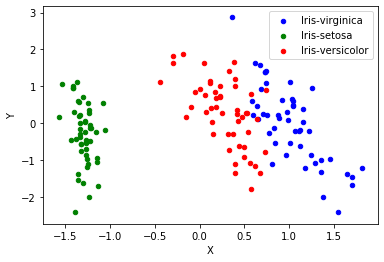

In [56]:
from sklearn import decomposition
pca = decomposition.FactorAnalysis(n_components=2)
X = pca.fit_transform(df_iris.iloc[:,:-1].values)
pos = pd.DataFrame()
pos['X'] = X[:,0]
pos['Y'] = X[:,1]
pos['Species'] = df_iris['Species']
ax = pos.loc[pos['Species']=='virginica'].plot(kind='scatter', x='X', y='Y', color='blue', label='Iris-virginica')
ax = pos.loc[pos['Species']=='setosa'].plot(kind='scatter', x='X', y='Y', color='green', label='Iris-setosa', ax=ax)
ax = pos.loc[pos['Species']=='versicolor'].plot(kind='scatter', x='X', y='Y', color='red', label='Iris-versicolor', ax=ax)

## 主成分分析（PCA）
主成分分析是由因子分析进化而来的一种降维的方法，通过正交变换将原始特征转换为线性独立的特征，转换后得到的特征被称为主成分。主成分分析可以将原始维度降维到n个维度，有一个特例情况，就是通过主成分分析将维度降低为2维，这样的话，就可以将多维数据转换为平面中的点，来达到多维数据可视化的目的。

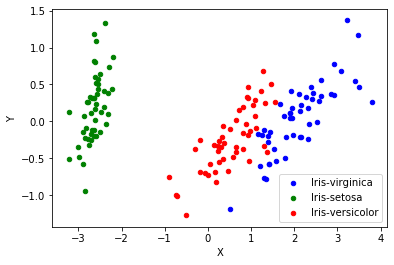

In [57]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(df_iris.iloc[:,:-1].values)
pos = pd.DataFrame()
pos['X'] = X[:,0]
pos['Y'] = X[:,1]
pos['Species'] = df_iris['Species']
ax = pos.loc[pos['Species']=='virginica'].plot(kind='scatter', x='X', y='Y', color='blue', label='Iris-virginica')
ax = pos.loc[pos['Species']=='setosa'].plot(kind='scatter', x='X', y='Y', color='green', label='Iris-setosa', ax=ax)
ax = pos.loc[pos['Species']=='versicolor'].plot(kind='scatter', x='X', y='Y', color='red', label='Iris-versicolor', ax=ax)

## 独立成分分析(ICA)
独立成分分析将多源信号拆分成最大可能独立性的子成分，它最初不是用来降维，而是用于拆分重叠的信号。

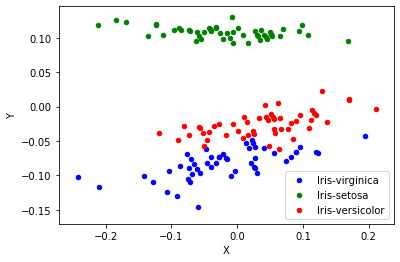

In [59]:
from sklearn import decomposition
pca = decomposition.FastICA(n_components=2)
X = pca.fit_transform(df_iris.iloc[:,:-1].values)
pos = pd.DataFrame()
pos['X'] = X[:,0]
pos['Y'] = X[:,1]
pos['Species'] = df_iris['Species']
ax = pos.loc[pos['Species']=='virginica'].plot(kind='scatter', x='X', y='Y', color='blue', label='Iris-virginica')
ax = pos.loc[pos['Species']=='setosa'].plot(kind='scatter', x='X', y='Y', color='green', label='Iris-setosa', ax=ax)
ax = pos.loc[pos['Species']=='versicolor'].plot(kind='scatter', x='X', y='Y', color='red', label='Iris-versicolor', ax=ax)

## 多维度量尺（Multi-dimensional scaling, MDS）
多维量表试图寻找原始高维空间数据的距离的良好低维表征。简单来说，多维度量尺被用于数据的相似性，它试图用几何空间中的距离来建模数据的相似性，直白来说就是用二维空间中的距离来表示高维空间的关系。数据可以是物体之间的相似度、分子之间的交互频率或国家间交易指数。这一点与前面的方法不同，前面的方法的输入都是原始数据，而在多维度量尺的例子中，输入是基于欧式距离的距离矩阵。多维度量尺算法是一个不断迭代的过程，因此，需要使用max_iter来指定最大迭代次数，同时计算的耗时也是上面算法中最大的一个。

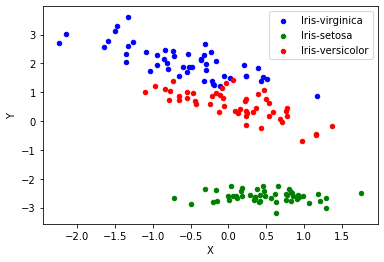

In [83]:
from sklearn import manifold
from sklearn.metrics import euclidean_distances
similarities = euclidean_distances(df_iris.iloc[:,:-1].values)
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, dissimilarity='precomputed', n_jobs=1)
X = mds.fit(similarities).embedding_
pos = pd.DataFrame(X, columns=['X','Y'])
pos['Species'] = df_iris['Species']
ax = pos.loc[pos['Species']=='virginica'].plot(kind='scatter', x='X', y='Y', color='blue', label='Iris-virginica')
ax = pos.loc[pos['Species']=='setosa'].plot(kind='scatter', x='X', y='Y', color='green', label='Iris-setosa', ax=ax)
ax = pos.loc[pos['Species']=='versicolor'].plot(kind='scatter', x='X', y='Y', color='red', label='Iris-versicolor', ax=ax)